In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devendra416/ddos-datasets")

print("Path to dataset files:", path)

/home/vanya/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2.68G/2.68G [08:45<00:00, 5.48MB/s]

Extracting files...


Path to dataset files: /home/vanya/.cache/kagglehub/datasets/devendra416/ddos-datasets/versions/1


In [1]:

import dask.dataframe as dd

path = "/home/vanya/bigdata_dataset/ddos_balanced/final_dataset.csv"
dd.read_csv(path).to_parquet("data.parquet")

    


KeyboardInterrupt: 

In [2]:
import numpy as np
import pandas as pd
import os
df = pd.read_parquet("data.parquet").sample(frac=0.1)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1279463 entries, 78544 to 99705
Data columns (total 85 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1279463 non-null  int64  
 1   Flow ID            1279463 non-null  string 
 2   Src IP             1279463 non-null  string 
 3   Src Port           1279463 non-null  int64  
 4   Dst IP             1279463 non-null  string 
 5   Dst Port           1279463 non-null  int64  
 6   Protocol           1279463 non-null  int64  
 7   Timestamp          1279463 non-null  string 
 8   Flow Duration      1279463 non-null  int64  
 9   Tot Fwd Pkts       1279463 non-null  int64  
 10  Tot Bwd Pkts       1279463 non-null  int64  
 11  TotLen Fwd Pkts    1279463 non-null  float64
 12  TotLen Bwd Pkts    1279463 non-null  float64
 13  Fwd Pkt Len Max    1279463 non-null  float64
 14  Fwd Pkt Len Min    1279463 non-null  float64
 15  Fwd Pkt Len Mean   1279463 non-null

In [4]:
df = df.astype({'Src IP':'string','Dst IP':'string','Label':'string'}) 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

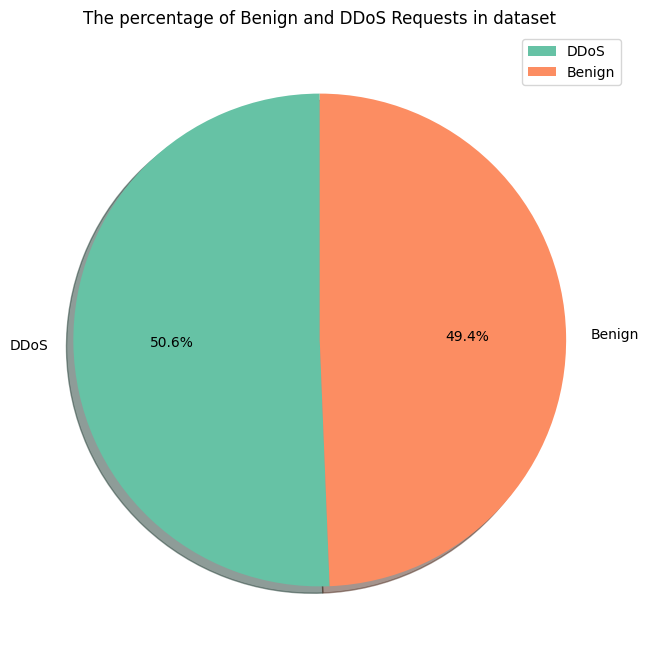

In [7]:
Label = ['DDoS','Benign']
num_of_ddos_classes = df['Label'].value_counts()['ddos']
num_of_benign_classes = df['Label'].value_counts()['Benign']
plt.figure(figsize = (13,8))
colors = sns.color_palette("Set2")
plt.pie([num_of_ddos_classes, num_of_benign_classes], labels=Label, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.legend(['DDoS', 'Benign'])
plt.title('The percentage of Benign and DDoS Requests in dataset')
plt.show()

# Переведем object в тип string и закодируем ip

In [8]:
import ipaddress                                                                   # converting the IP address form Strings to int

df = df.astype({'Src IP':'string','Dst IP':'string','Label':'string'}) 

df['Src IP'] = df['Src IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['Dst IP'] = df['Dst IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))


In [9]:
df


,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
78544,2860982,172.31.69.25-18.219.193.20-80-35120-6,2887730457,80,316391700,35120,6,16/02/2018 11:22:43 PM,4171116,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
107810,3456121,172.31.66.119-94.131.223.46-3389-63390-6,1585700654,63390,2887729783,3389,6,20/02/2018 09:13:37,2879928,10,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
93165,2645657,172.31.0.2-172.31.64.87-53-51832-17,2887729239,51832,2887712770,53,17,20/02/2018 02:36:39,34087,2,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
24230,3188177,172.31.0.2-172.31.65.82-53-63825-17,2887729490,63825,2887712770,53,17,20/02/2018 09:33:13,17528,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1698,350145,172.31.69.25-18.219.193.20-80-36216-6,316391700,36216,2887730457,80,6,16/02/2018 11:17:08 PM,2596,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60542,7875954,172.31.67.8-186.113.19.123-445-56577-6,2887729928,445,3127972731,56577,6,20/02/2018 03:55:49,21,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
30361,7273244,172.31.64.61-185.70.187.189-3389-51045-6,2887729213,3389,3108420541,51045,6,20/02/2018 12:38:26,88453813,2,...,20,0.0,0.0,0.0,0.0,88453813.0,0.0,88453813.0,88453813.0,Benign
103040,903539,172.31.69.25-18.219.193.20-80-56348-6,316391700,56348,2887730457,80,6,16/02/2018 11:21:12 PM,22664,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


# Проверим наличие пропусков в датасете

In [10]:
g = df.isna().sum()
for col_name in g.index:
    if g[col_name] != 0:
        print("Найдено пропусков ", col_name, g[col_name])

Найдено пропусков  Flow Byts/s 3056


# Найдем столбцы столбцы с большим кол-во повторяющихся значений

In [11]:

rowbuilder = lambda col: {'col': col, 'unique_values': df[col].nunique(), 'most_frequent_value': df[col].value_counts().index[0],'frequency': df[col].value_counts(normalize=True).values[0]}
frequency = [rowbuilder(col) for col in df.columns]
skewed = pd.DataFrame(frequency)

skewed = skewed[skewed['frequency'] >= 0.95]
colsToDrop = skewed['col'].values
colsToDrop

array(['Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'FIN Flag Cnt', 'URG Flag Cnt', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg', 'Active Std'], dtype=object)

# Так как мы знаем о пропусках, заполним их средними значениями

In [12]:

del rowbuilder
del frequency

df.dropna(inplace=True)

# Удалим столбцы с большим кол-во повторяющихся значений

In [13]:

df.drop(columns=colsToDrop, inplace=True)

print('After dropping some columns: \n\t there are {} columns and {} rows'.format(len(df.columns), len(df)))

After dropping some columns: 
	 there are 72 columns and 1276407 rows


# Удалим строки с некорректными значениями


In [14]:
import numpy as np
import pandas as pd

numeric_columns = df.select_dtypes(include=[np.number]).columns
inf_subset = df[numeric_columns].columns[np.isinf(df[numeric_columns]).any(axis=0)].tolist()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=inf_subset, how="all", inplace=True)
# assert not np.isinf(df[numeric_columns]).any().any()
colsToDrop = set(colsToDrop)

In [15]:
df.shape

(1274592, 72)

# Удалим возможные отрицательные значения (признаки приведенные ниже не могу быть отрицательными)


In [16]:
negValCols = ['Src IP', 'Dst IP', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Init Bwd Win Byts', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Min']
print(colsToDrop)
negValCols = set(negValCols) - colsToDrop
print(negValCols)
for col in negValCols:
    if df[col].dtype in ['float64', 'int64']:
        df = df[df[col] >= 0]

{'Bwd Byts/b Avg', 'Active Std', 'Bwd URG Flags', 'FIN Flag Cnt', 'Fwd PSH Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'URG Flag Cnt', 'Bwd Pkts/b Avg', 'Bwd PSH Flags', 'Fwd URG Flags', 'Fwd Blk Rate Avg'}
{'Dst IP', 'Bwd IAT Tot', 'Flow IAT Mean', 'Src IP', 'Flow IAT Max', 'Bwd IAT Max', 'Bwd IAT Min', 'Flow Pkts/s', 'Flow IAT Min', 'Bwd IAT Mean', 'Init Bwd Win Byts'}


In [17]:
df.shape

(918828, 72)

# Опираясь на предметную область, выберем наиболее важные признаки

In [29]:
most_important_features = set([
    "Src IP",
    "Src Port",
    "Dst IP",
    "Dst Port",
    "Tot Fwd Pkts",
    "Tot Bwd Pkts",
    "Fwd Pkt Len Max",
    "TotLen Fwd Pkts",
    "Init Bwd Win Byts",
    "Bwd Pkt Len Std",
    "Flow Duration",
    "Fwd IAT Mean",
    "Flow IAT Min",
    "Bwd IAT Tot",
    "SYN Flag Cnt",
    "RST Flag Cnt",
    "Flow Pkts/s",
    "Flow Byts/s",
    "Label"])
most_important_features = set([
    "Tot Fwd Pkts",
    "Tot Bwd Pkts",
    "Fwd Pkt Len Max",
    "TotLen Fwd Pkts",
    "Init Bwd Win Byts",
    "Bwd Pkt Len Std",
    "Flow Duration",
    "Fwd IAT Mean",
    "Flow IAT Min",
    "Bwd IAT Tot",
    "SYN Flag Cnt",
    "RST Flag Cnt",
    "Flow Pkts/s",
    "Flow Byts/s",
    "Label"])
droped_cols = set([i for i in colsToDrop]) | set(inf_subset)
colsToUse = list(most_important_features - droped_cols)
colsToUse

['Bwd Pkt Len Std',
 'Fwd Pkt Len Max',
 'Bwd IAT Tot',
 'Fwd IAT Mean',
 'Tot Fwd Pkts',
 'RST Flag Cnt',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'Label',
 'SYN Flag Cnt',
 'Flow IAT Min',
 'Flow Duration',
 'Init Bwd Win Byts']

In [30]:
df = df[colsToUse]
df

,Bwd Pkt Len Std,Fwd Pkt Len Max,Bwd IAT Tot,Fwd IAT Mean,Tot Fwd Pkts,RST Flag Cnt,Tot Bwd Pkts,TotLen Fwd Pkts,Label,SYN Flag Cnt,Flow IAT Min,Flow Duration,Init Bwd Win Byts
__null_dask_index__,,,,,,,,,,,,,
78544,124.923977,935.0,4171116.0,28988.000000,3,0,6,935.0,ddos,0,8.0,4171116,225
107810,430.098604,677.0,2738673.0,319992.000000,10,1,7,1144.0,Benign,0,48.0,2879928,62856
1698,0.000000,0.0,0.0,0.000000,1,0,1,0.0,ddos,0,2596.0,2596,225
75234,0.000000,0.0,0.0,0.000000,1,0,1,0.0,ddos,0,959.0,959,32738
61766,199.371011,935.0,4916039.0,161862.000000,4,0,6,935.0,ddos,0,8.0,4952378,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16602,0.000000,0.0,0.0,0.000000,1,0,1,0.0,ddos,0,1925.0,1925,32738
3367,164.500000,935.0,4277441.0,17769.333333,4,0,4,935.0,ddos,0,7.0,4279100,211
85529,430.098604,677.0,1643836.0,259924.857143,8,1,7,1148.0,Benign,0,5.0,1819474,62852


# Гистограммы для признаков

KeyboardInterrupt: 

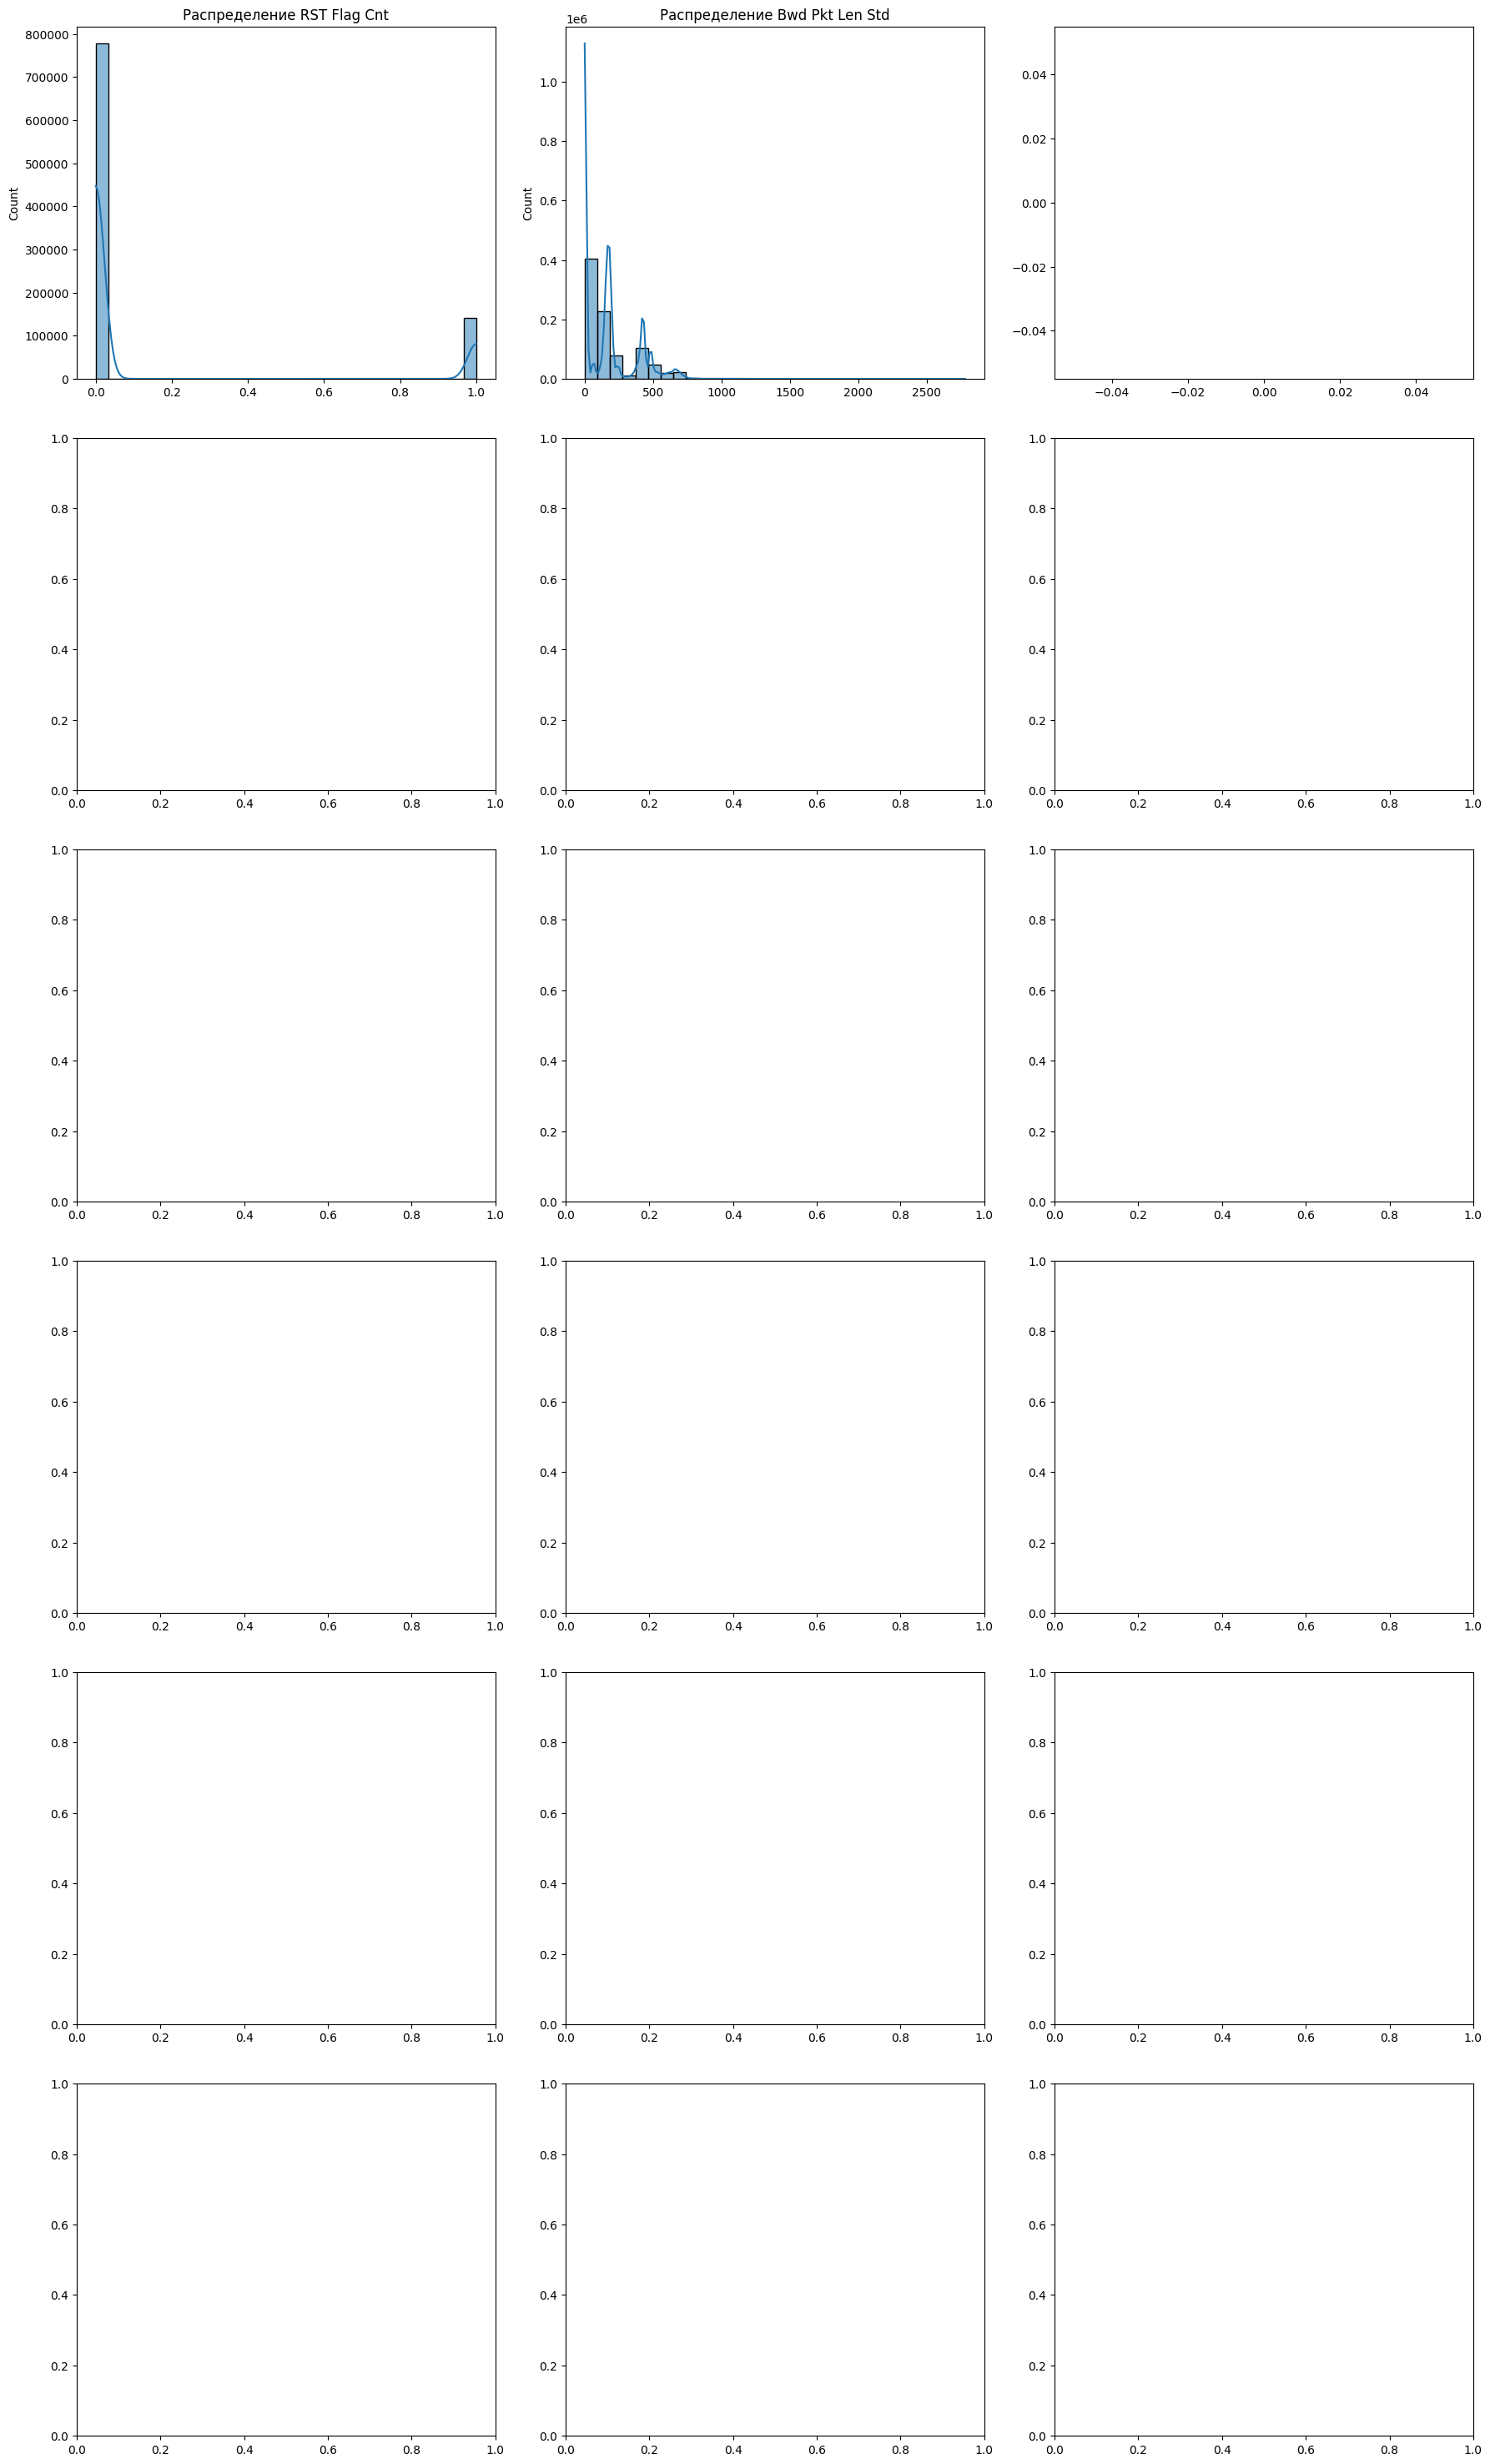

In [52]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3 
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*5))
fig.tight_layout(pad=3.0) 

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_num = i % n_cols
    if n_rows > 1:
        ax = axes[row, col_num]
    else:
        ax = axes[col_num]  
        
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Распределение {col}')
    ax.set_xlabel('')
    
for j in range(i+1, n_rows*n_cols):
    row = j // n_cols
    col_num = j % n_cols
    if n_rows > 1:
        axes[row, col_num].axis('off')
    else:
        axes[col_num].axis('off')

plt.show()

# Расчитаем выбросы

In [31]:
import numpy as np
from robustats import medcouple

def adjusted_boxplot(data):
    data = np.array(data, dtype=np.float64)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    mc = medcouple(data)  
    
    if mc >= 0:
        lower_bound = q1 - 1.5 * np.exp(-4 * mc) * iqr
        upper_bound = q3 + 1.5 * np.exp(3 * mc) * iqr
    else:
        lower_bound = q1 - 1.5 * np.exp(-3 * mc) * iqr
        upper_bound = q3 + 1.5 * np.exp(4 * mc) * iqr
    
    return lower_bound, upper_bound


def outliers_iqr(data, coef=4):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - coef * iqr
    upper_bound = q3 + coef * iqr
    return lower_bound, upper_bound

def outliers(df, feature):
    if df[feature].dtype in ["float64", "int64"] and feature not in set(["Label", "Src Port", "Src IP", "Dst IP"]):
        main_data = df[df[feature] > 0][feature]
        soft_upper = main_data.quantile(0.95)  
        extreme_mask = (df[feature] > soft_upper)
        df[feature] = np.where(extreme_mask, soft_upper, df[feature])  # Winsorization

# Выберем подвыборку для GNB и для random forest

In [33]:
df_forest = df.copy()
df_gaus = df.copy()
# df_gaus.drop(columns=['Label', 'Src Port', 'Src IP', 'Dst IP'])

for feature in df_gaus.columns:
    outliers(df_gaus, feature)
    print(len(df_gaus))


918828
918828
918828
918828
918828
918828
918828
918828
918828
918828
918828
918828
918828


In [34]:
df_gaus.shape

(918828, 13)

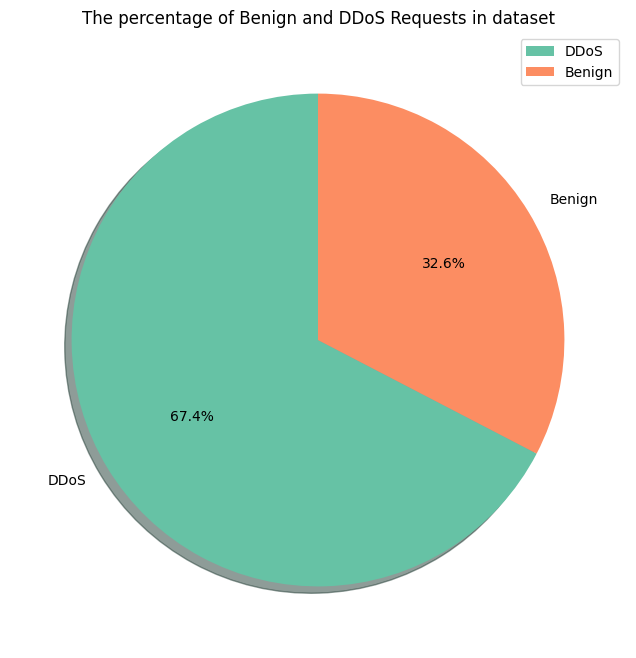

In [35]:
Label = ['DDoS','Benign']
num_of_ddos_classes = df['Label'].value_counts()['ddos']
num_of_benign_classes = df['Label'].value_counts()['Benign']
plt.figure(figsize = (13,8))
colors = sns.color_palette("Set2")
plt.pie([num_of_ddos_classes, num_of_benign_classes], labels=Label, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.legend(['DDoS', 'Benign'])
plt.title('The percentage of Benign and DDoS Requests in dataset')
plt.show()

# Возпользуемся GNB классификатором


Метрики классификации:
Точность на обучении:     0.8450
Точность на тесте:        0.8437
Precision (Точность):     0.8467
Recall (Полнота):         0.9372
AUC-ROC:                  0.8747


<Figure size 800x600 with 0 Axes>

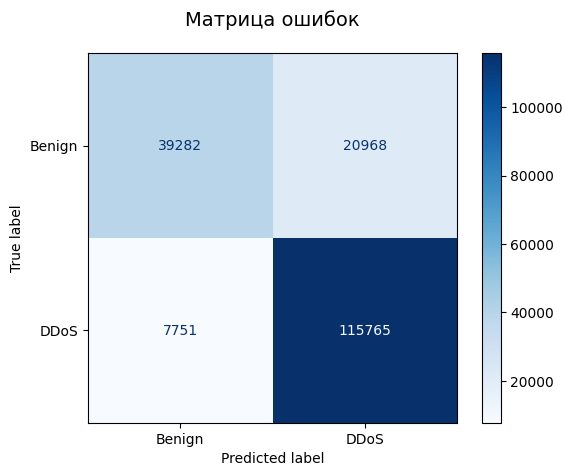

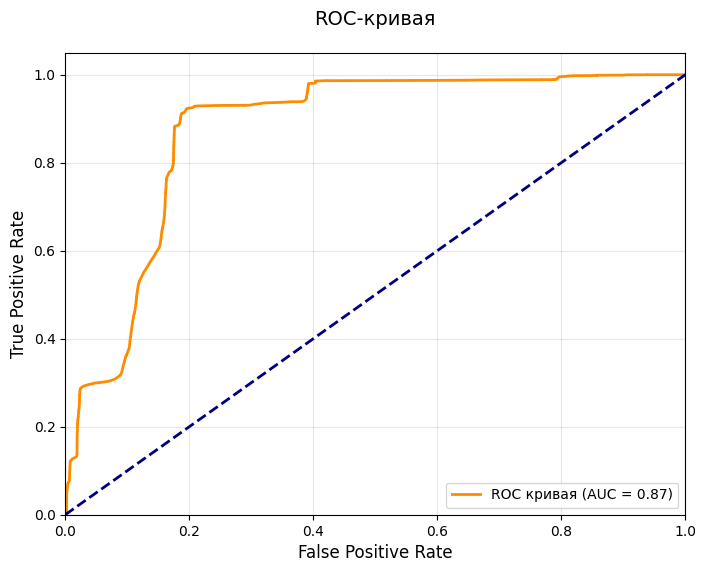

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            confusion_matrix, roc_curve, roc_auc_score, 
                            ConfusionMatrixDisplay)
import seaborn as sns

Y = df_gaus['Label']
label_mapping = {'Benign': 0, 'ddos': 1}
Y = Y.map(label_mapping)
X = df_gaus.drop(columns=['Label'])

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=44
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = GaussianNB(priors=[0.5, 0.5])
classifier.fit(X_train_scaled, y_train)

y_pred_train = classifier.predict(X_train_scaled)
y_pred_test = classifier.predict(X_test_scaled)
y_proba_test = classifier.predict_proba(X_test_scaled)[:, 1] 

print('\n\033[1mМетрики классификации:\033[0m')
print(f"{'Точность на обучении:':<25} {accuracy_score(y_train, y_pred_train):.4f}")
print(f"{'Точность на тесте:':<25} {accuracy_score(y_test, y_pred_test):.4f}")
print(f"{'Precision (Точность):':<25} {precision_score(y_test, y_pred_test):.4f}")
print(f"{'Recall (Полнота):':<25} {recall_score(y_test, y_pred_test):.4f}")
print(f"{'AUC-ROC:':<25} {roc_auc_score(y_test, y_proba_test):.4f}")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=['Benign', 'DDoS'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица ошибок', fontsize=14, pad=20)
plt.grid(False)
plt.show()

plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
plt.plot(fpr, tpr, color='darkorange', lw=2, 
        label=f'ROC кривая (AUC = {roc_auc_score(y_test, y_proba_test):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-кривая', fontsize=14, pad=20)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)


# Используем случайный лес

# Random forest

<Axes: >

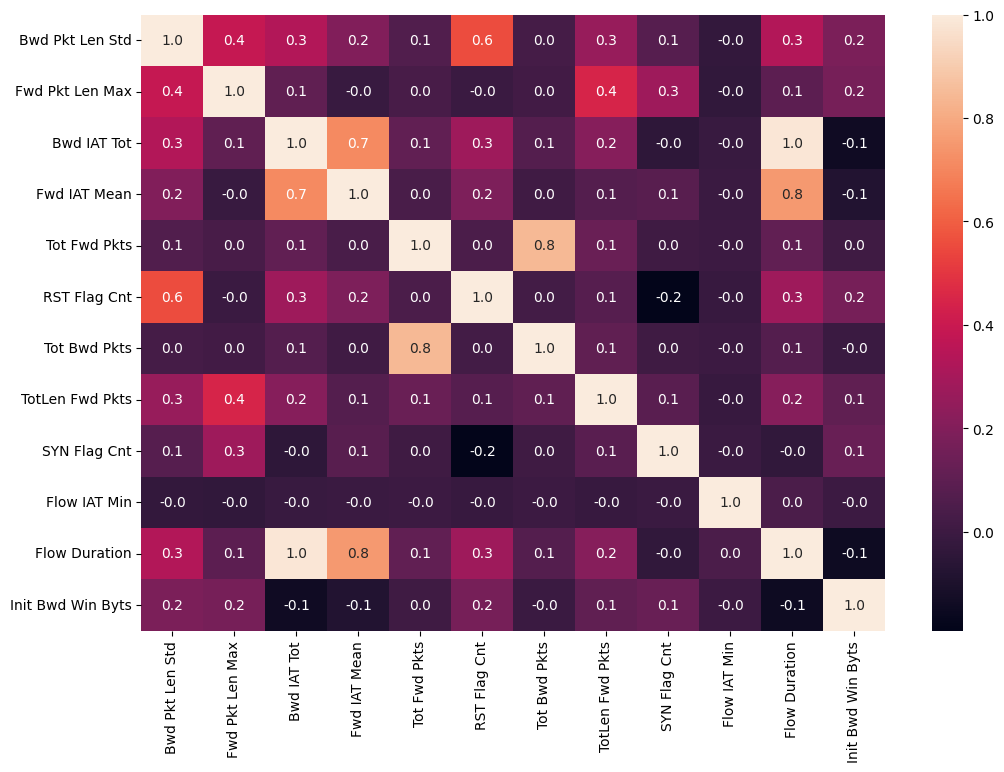

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


Y = df_forest['Label']  
label_mapping = {'Benign': 0, 'ddos': 1}
Y = Y.map(label_mapping)  
X = df_forest.drop(columns=['Label']) 
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, fmt=".1f")

In [37]:
print(X.columns.tolist())

correlations = X.corrwith(Y)
print(correlations.sort_values(ascending=False).head(10))

['Bwd Pkt Len Std', 'Fwd Pkt Len Max', 'Bwd IAT Tot', 'Fwd IAT Mean', 'Tot Fwd Pkts', 'RST Flag Cnt', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'SYN Flag Cnt', 'Flow IAT Min', 'Flow Duration', 'Init Bwd Win Byts']
SYN Flag Cnt         0.137403
Fwd Pkt Len Max      0.074295
Flow IAT Min         0.004556
Tot Bwd Pkts        -0.037997
Tot Fwd Pkts        -0.068367
TotLen Fwd Pkts     -0.123846
Init Bwd Win Byts   -0.221719
Fwd IAT Mean        -0.335984
Bwd IAT Tot         -0.344377
Flow Duration       -0.357775
dtype: float64


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.1s finished


              precision    recall  f1-score   support

      Benign       0.98      0.99      0.99     60250
        DDoS       0.99      0.99      0.99    123516

    accuracy                           0.99    183766
   macro avg       0.99      0.99      0.99    183766
weighted avg       0.99      0.99      0.99    183766



<Figure size 800x600 with 0 Axes>

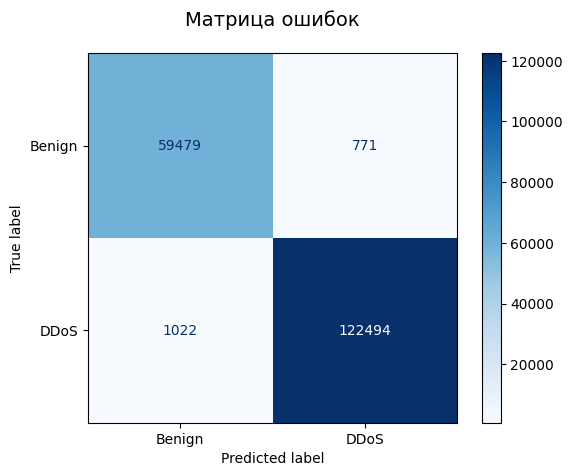

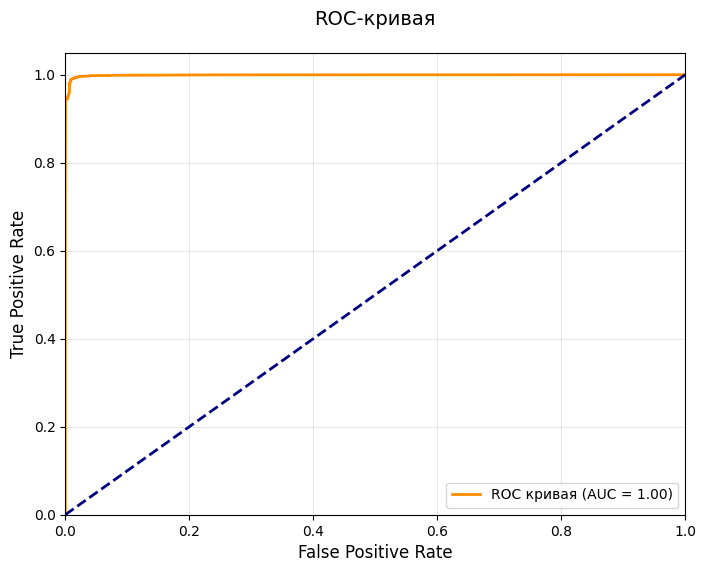


Топ-5 признаков по средней энтропии:
feature
Tot Fwd Pkts       0.444896
TotLen Fwd Pkts    0.333834
Tot Bwd Pkts       0.237166
Bwd Pkt Len Std    0.181791
Flow IAT Min       0.179158
Name: entropy, dtype: float64


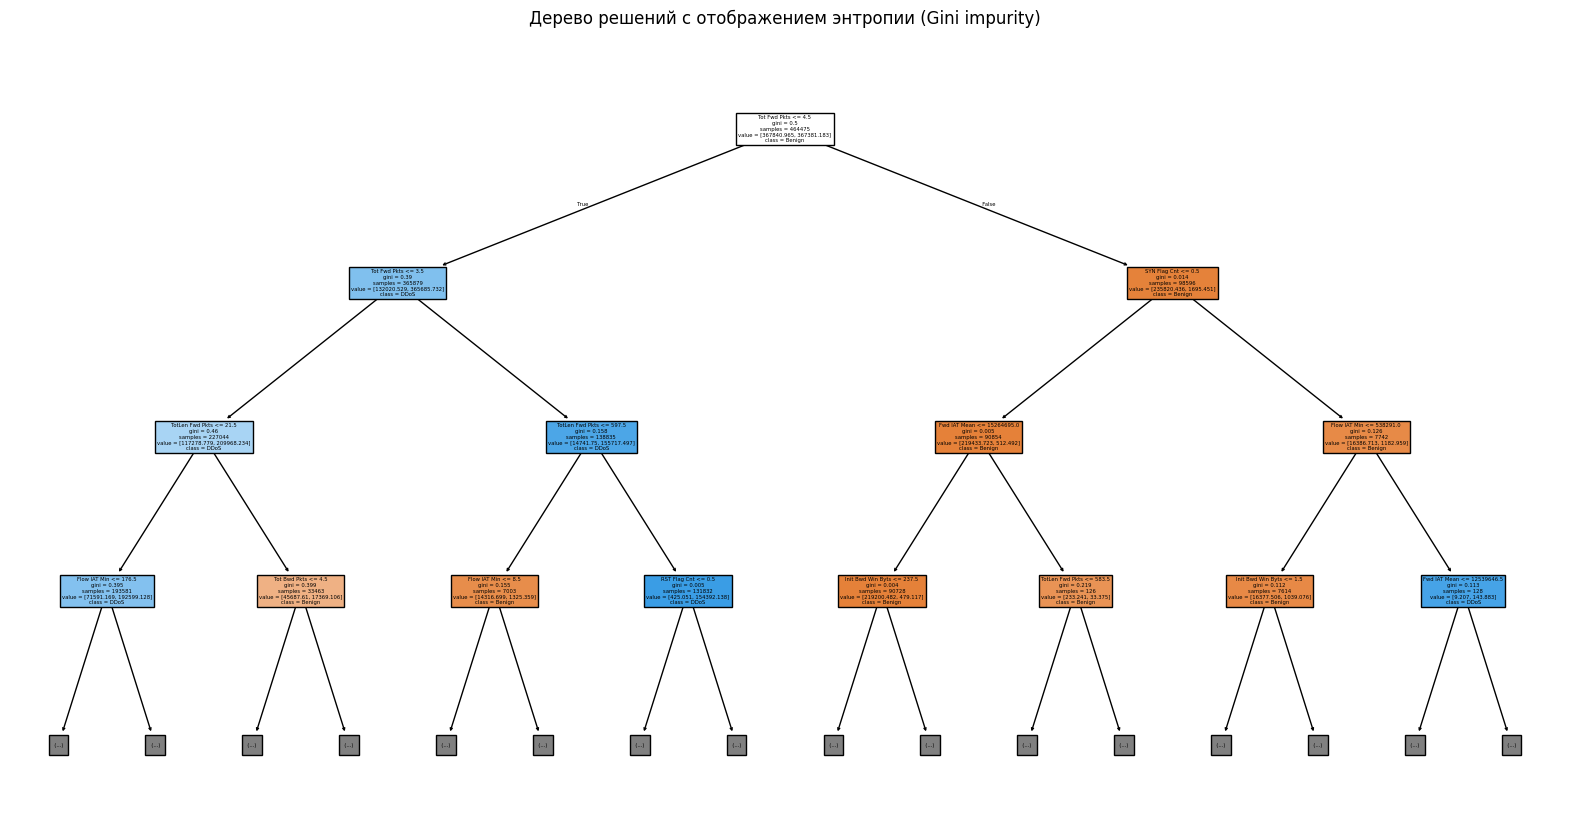

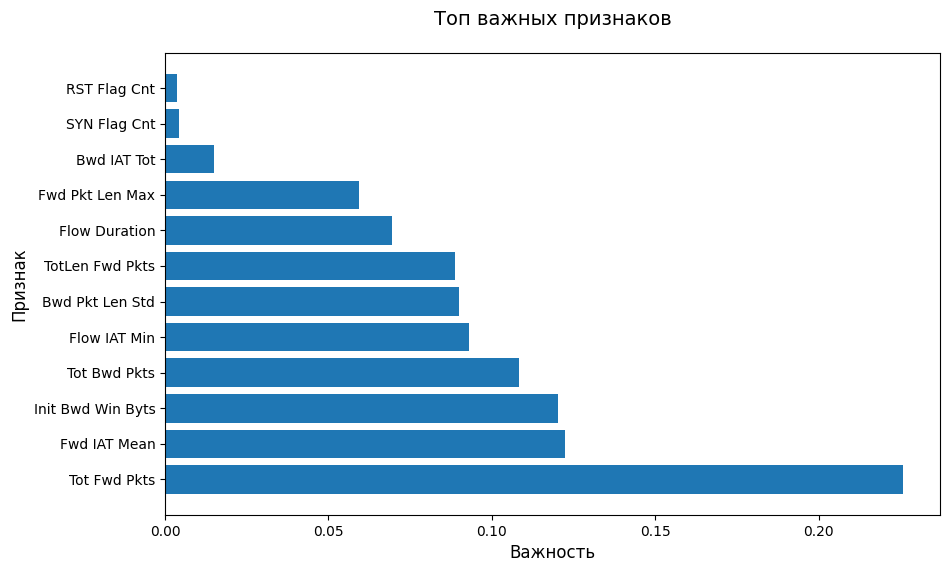

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=44  
)

forest = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=2,
    random_state=33,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1,
    class_weight='balanced',
    verbose=1
)
forest.fit(X_train, y_train)

y_pred_test = forest.predict(X_test)
y_proba_test = forest.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_test, target_names=['Benign', 'DDoS']))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=['Benign', 'DDoS'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица ошибок', fontsize=14, pad=20)
plt.grid(False)
plt.show()

# ROC-кривая
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
plt.plot(fpr, tpr, color='darkorange', lw=2, 
        label=f'ROC кривая (AUC = {roc_auc_score(y_test, y_proba_test):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-кривая', fontsize=14, pad=20)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

def get_node_stats(tree, feature_names):
    n_nodes = tree.tree_.node_count
    left_child = tree.tree_.children_left
    right_child = tree.tree_.children_right
    feature = tree.tree_.feature
    impurity = tree.tree_.impurity
    
    node_stats = []
    for i in range(n_nodes):
        if left_child[i] != right_child[i]:  # Если не лист
            node_stats.append({
                'node_id': i,
                'feature': feature_names[feature[i]],
                'entropy': impurity[i],
                'threshold': tree.tree_.threshold[i]
            })
    return pd.DataFrame(node_stats)

tree = forest.estimators_[0]
entropy_stats = get_node_stats(tree, X.columns)

top_entropy_features = entropy_stats.groupby('feature')['entropy'].mean().sort_values(ascending=False).head(5)
print("\nТоп-5 признаков по средней энтропии:")
print(top_entropy_features)


plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=X.columns,
          class_names=['Benign', 'DDoS'], 
          filled=True,
          impurity=True,
          max_depth=3)
plt.title("Дерево решений с отображением энтропии (Gini impurity)", pad=20)
plt.show()

# Важность признаков
importances = forest.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:20], 
        feature_importance['Importance'][:20])
plt.title('Топ важных признаков', fontsize=14, pad=20)
plt.xlabel('Важность', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.show()